# Analítica Avanzada de Datos. - Práctica 1
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

#### MARAVILLA PÉREZ VIANEY
#### MONDOLLA CERVANTES ERIN
#### RAMIREZ MENDEZ KEVIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de flights.csv
df = pd.read_csv('flights.csv')

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips: 
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos 
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [3]:
# Se visualizan las columnas
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
# Se visualizan los datos faltantes
print("\t Datos faltantes en el dataset:")
print("\t_____________________\n")
print(df.isnull().sum())

print("\n Se observan datos faltantes dentro de la tabla DepDel25 con 2761 datos faltantes")

	 Datos faltantes en el dataset:
	_____________________

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

 Se observan datos faltantes dentro de la tabla DepDel25 con 2761 datos faltantes


In [5]:
# Borrado de datos faltantes de DEPDEL 15
df.dropna(inplace = True)

In [6]:
# Se verifica que se hayan borrado correctamente los datos
print("\t Datos faltantes:")
print("\t_____________________\n")
print(df.isnull().sum())
print("\n Se logra observar que no tiene ya la columna DepDel15 datos faltantes")

	 Datos faltantes:
	_____________________

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

 Se logra observar que no tiene ya la columna DepDel15 datos faltantes


C:\Users\viane\AppData\Local\Temp\ipykernel_11924\903904877.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


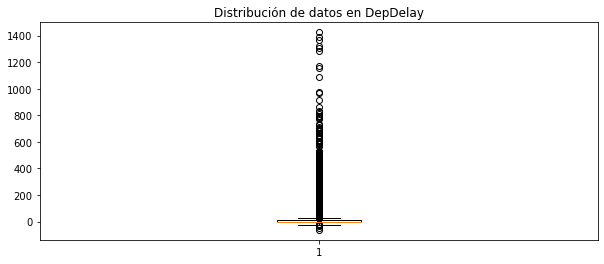

In [7]:
# Se visualiza la distribución de los datos de las columnas
visualizacion = df['DepDelay']
fig = plt.figure(figsize=(10,4))
plt.boxplot(visualizacion)
plt.title('Distribución de datos en DepDelay')
fig.show()

C:\Users\viane\AppData\Local\Temp\ipykernel_11924\2341081012.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


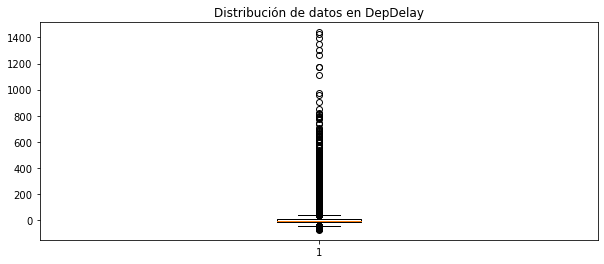

In [8]:
# Se visualiza la distribución de los datos de las columnas
visualizacion = df['ArrDelay']
fig = plt.figure(figsize=(10,4))
plt.boxplot(visualizacion)
plt.title('Distribución de datos en DepDelay')
fig.show()

In [9]:
df

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [12]:
# Percentiles esten entre 1 y 90
df = df[df['DepDelay'].between(df['DepDelay'].quantile(.01), df['DepDelay'].quantile(.90))]
df = df[df['ArrDelay'].between(df['ArrDelay'].quantile(.01), df['ArrDelay'].quantile(.90))]
df

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271931,2013,7,5,5,WN,15304,Tampa International,Tampa,FL,10529,Bradley International,Hartford,CT,1100,2,0.0,1350,-10,0,0
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0


In [44]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,173167.0,173167.000000,173167.000000,173167.000000,173167.000000,173167.000000,173167.000000,173167.000000,173167.0,173167.000000,173167.000000,173167.000000,173167.000000
mean,2013.0,7.046083,15.790566,3.909735,12764.781702,12726.577437,1258.829910,-2.244954,0.0,1440.655344,-8.589616,0.000387,0.000387
std,0.0,2.016884,8.891609,2.007499,1517.369716,1509.463612,470.765138,4.299495,0.0,484.633634,8.126761,0.019666,0.019666
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.0,1.000000,-30.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,840.000000,-5.000000,0.0,1040.000000,-14.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1215.000000,-3.000000,0.0,1424.000000,-8.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1640.000000,0.000000,0.0,1831.000000,-2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,10.000000,0.0,2359.000000,6.000000,1.000000,1.000000


In [59]:
coloresMedallas = ['#FFD700','#C0C0C0','#8C7853'] # Definir colores para las graficas

## ¿Cuáles son los promedios (mean) de salida y llegada?

In [23]:
media = df['DepDelay'].mean()
media2 = df['ArrDelay'].mean()
print("La media de DepDelay", media)
print("La media de ArrDely", media2)

La media de DepDelay -2.2449542926770114
La media de ArrDely -8.589615804396912


C:\Users\viane\AppData\Local\Temp\ipykernel_11924\4029457779.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


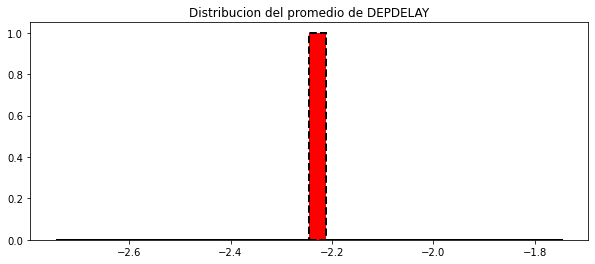

In [36]:
# Graficamente DEPDELAY
fig = plt.figure(figsize=(10,4))
plt.hist(media, bins = 30, color='red', linestyle='dashed', linewidth=2, edgecolor="Black")
plt.title('Distribucion del promedio de DEPDELAY')
fig.show()

C:\Users\viane\AppData\Local\Temp\ipykernel_11924\2124526947.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


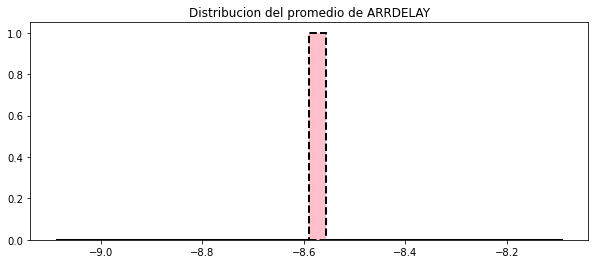

In [39]:
# Graficamente ARRDELAY 
fig = plt.figure(figsize=(10,4))
plt.hist(media2, bins = 30, color='pink', linestyle='dashed', linewidth=2, edgecolor="Black")
plt.title('Distribucion del promedio de ARRDELAY')
fig.show()

#### Los promedios son: la media de DepDelay -2.2449542926770114, la media de ArrDely -8.589615804396912 como vimos anteriormente

# ¿Como se comparan las Carrier en cuanto a retrasos de llegada?

In [52]:
df2 = df.groupby('Carrier')['ArrDelay'].mean()
df2

Carrier
9E   -10.581730
AA    -9.534061
AS    -7.383153
B6    -9.658662
DL    -9.558581
EV   -10.375273
F9    -4.875121
FL    -8.063313
HA    -4.610661
MQ    -8.623526
OO    -7.497609
UA   -11.220276
US    -8.064058
VX    -8.811038
WN    -6.300269
YV    -7.077784
Name: ArrDelay, dtype: float64

<AxesSubplot:title={'center':'Retrasos de llegada por aerolineas'}, ylabel='Carrier'>

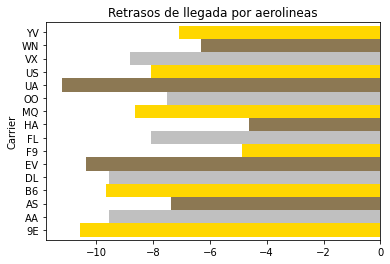

In [97]:
df2 = df.groupby('Carrier')['ArrDelay'].mean()
df2.plot(kind = 'barh', width=1, title = 'Retrasos de llegada por aerolineas', color = coloresMedallas)

# ¿Hay días de la semana más propensos a las llegadas que otros?

In [65]:
df3 = df.groupby('DayOfWeek')['ArrDelay'].mean()
df3

DayOfWeek
1   -8.510421
2   -8.792794
3   -8.421138
4   -8.037572
5   -8.238097
6   -9.253836
7   -8.928502
Name: ArrDelay, dtype: float64

<AxesSubplot:title={'center':'Retrasos de llegada por día de la semana'}, ylabel='DayOfWeek'>

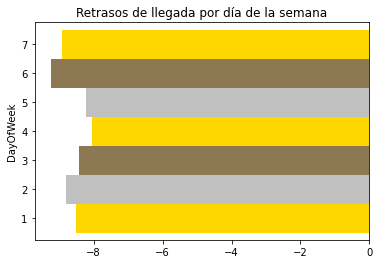

In [98]:
df3 = df.groupby('DayOfWeek')['ArrDelay'].mean()
df3.plot(kind = 'barh', width=1, title = 'Retrasos de llegada por día de la semana', color = coloresMedallas)

### El día de la semana con más retrasos es el día 'jueves' que representa el día 6

# ¿Cuál es el aeropuerto de salida con mayor retraso medio?

In [73]:
df4 = df.groupby('OriginAirportName')['DepDelay'].mean()
df4

OriginAirportName
Albuquerque International Sunport                      -2.214112
Austin - Bergstrom International                       -1.885031
Baltimore/Washington International Thurgood Marshall   -1.086218
Bob Hope                                               -2.029412
Bradley International                                  -2.735456
                                                          ...   
Theodore Francis Green State                           -3.278560
Tucson International                                   -4.052761
Washington Dulles International                        -2.432396
Will Rogers World                                      -2.905520
William P Hobby                                        -0.213829
Name: DepDelay, Length: 70, dtype: float64

<AxesSubplot:title={'center':'Retrasos de salida por aeropuerto'}, xlabel='OriginAirportName'>

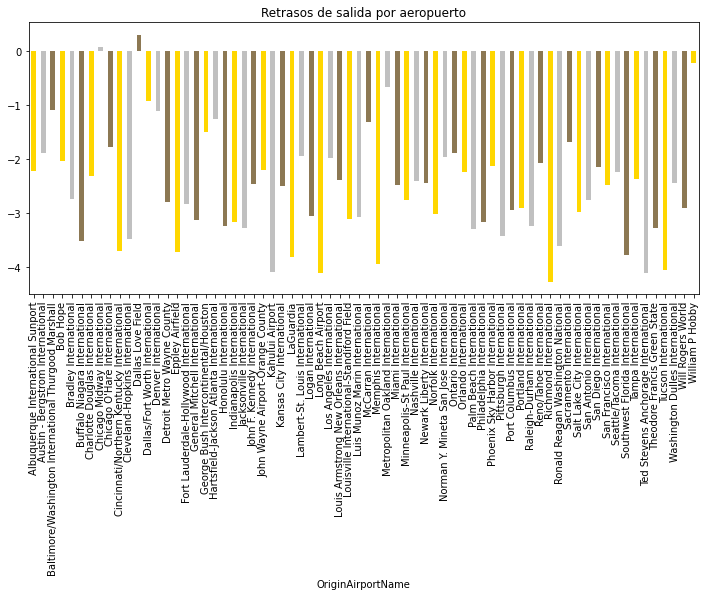

In [99]:
df4 = df.groupby('OriginAirportName')['DepDelay'].mean()
df4.plot(kind='bar', title='Retrasos de salida por aeropuerto', figsize=(12,5), color = coloresMedallas)

### Nos damos cueta que Richmond International es el aeropuerto que más tiene retraso por salida

# ¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?

In [84]:
df5 = df.groupby('DepDelay')['ArrDelay'].mean()
df5

DepDelay
-11   -13.893017
-10   -13.419703
-9    -12.752244
-8    -12.139452
-7    -11.570729
-6    -10.989512
-5    -10.458491
-4     -9.822331
-3     -9.251841
-2     -8.456375
-1     -7.710962
 0     -6.742194
 1     -6.282490
 2     -5.640803
 3     -5.203049
 4     -4.631689
 5     -4.121689
 6     -3.264923
 7     -2.960998
 8     -2.565517
 9     -2.101765
 10    -2.011561
Name: ArrDelay, dtype: float64

<AxesSubplot:title={'center':'Retrasos de llegada por retraso de salida'}, xlabel='DepDelay'>

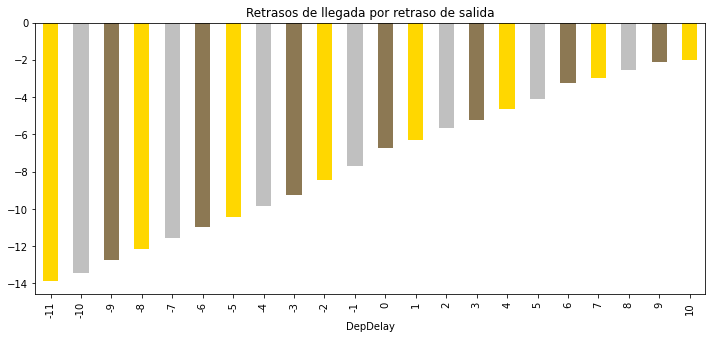

In [104]:
df5 = df.groupby('DepDelay')['ArrDelay'].mean()
df5.plot(kind='bar', title='Retrasos de llegada por retraso de salida', figsize=(12,5), color= coloresMedallas)

### Como logramos ver en la gráfica las salidas tardías logran provocar mayores retrasos en las llegadas

# ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?

In [114]:
df6 = df.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean()
df6

OriginAirportName                  DestAirportName                                     
Albuquerque International Sunport  Baltimore/Washington International Thurgood Marshall   -9.205882
                                   Chicago Midway International                           -7.545455
                                   Chicago O'Hare International                           -9.800000
                                   Dallas Love Field                                      -4.632075
                                   Dallas/Fort Worth International                        -6.625000
                                                                                             ...   
William P Hobby                    San Antonio International                              -4.060000
                                   San Diego International                                -7.296296
                                   Seattle/Tacoma International                            2.000000
            

### Logramos ver en la siguiente tabla que la ruta (del aeropuesto de origen al aeropuerto de destino) tiene más llegadas con retraso es la de "Baltimore / Washington International Thurgood Marshall"

# ¿Qué ruta tiene el mayor retraso medio de llegada?

<AxesSubplot:title={'center':'Rutas con el mayor retraso medio de llegada'}, xlabel='OriginAirportName,DestAirportName'>

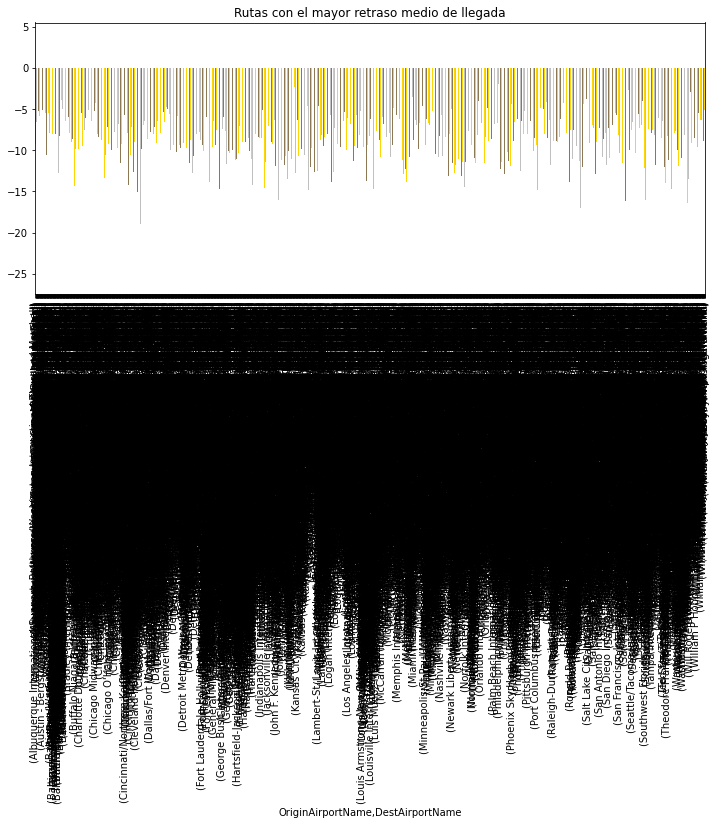

In [132]:
df7 = df.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean()
df7.plot(kind='bar', title='Rutas con el mayor retraso medio de llegada', figsize=(12,5), color = coloresMedallas)

### Como vemos en el gráfico, se pueden observar de distintas rutas con mayor retraso solo que no podemos ver con claridad de que ruta estamos hablando, así que haremos una visualización de que ruta es en una tabla:

In [141]:
# Seleccionar los valores máximos
max_values = df7[df7 == df7.max()]

# Almacenar los valores máximos en una nueva tabla
max_table = max_values

print("Original DataFrame:")
print(df7)
print("_____________________________________")
print("Valores maximos:")
print(max_table)

Original DataFrame:
OriginAirportName                  DestAirportName                                     
Albuquerque International Sunport  Baltimore/Washington International Thurgood Marshall   -9.205882
                                   Chicago Midway International                           -7.545455
                                   Chicago O'Hare International                           -9.800000
                                   Dallas Love Field                                      -4.632075
                                   Dallas/Fort Worth International                        -6.625000
                                                                                             ...   
William P Hobby                    San Antonio International                              -4.060000
                                   San Diego International                                -7.296296
                                   Seattle/Tacoma International                            2

### Podemos ver qe la ruta que más tiene mayor retraso medio de llegada es la que va desde Indianapolis International a Philadelphia International